# Regression

The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. <b> Note: Please do not use any ML libraries or packages. </b>

You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
# Read the data
data = pd.read_csv("Adops & Data Scientist Sample Data - Q2 Regression.csv", header=None)
data.columns=['A','B','C']
print(data.shape)
data.head()

(300, 3)


,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [3]:
# 201st (index 200) datapoint seems to be an outlier (or error)
data[data.C<-500]

,A,B,C
200,10.1,-2.24,-10000.0


In [4]:
data = data.drop(data.index[200])  # Drop the outlier for the performance

In [5]:
# Assign variables to the columns
X = data[data.columns[0:2]]
X1 = data[data.columns[0:1]]
X2 = data[data.columns[1:2]]
y = data[['C']]

In [6]:
data.corr()  # Check the correlation between variables (=columns)

,A,B,C
A,1.000000,-0.187059,0.010536
B,-0.187059,1.000000,-0.618516
C,0.010536,-0.618516,1.000000


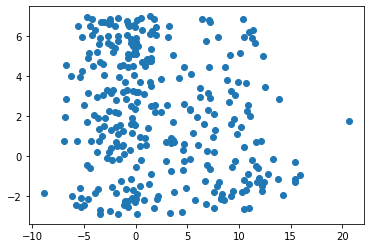

In [7]:
plt.scatter(X1,X2)  # Scatterplot (A,B)

In [8]:
data[X1.A>20]  # To check the rightmost datapoint

,A,B,C
209,20.6,1.74,-248.0


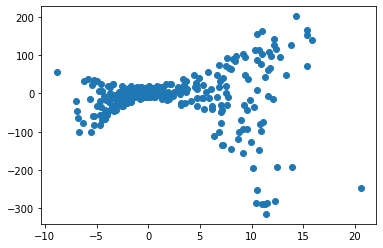

In [9]:
plt.scatter(X1,y)  # Scatterplot (A,C)

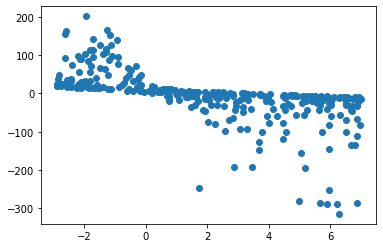

In [10]:
plt.scatter(X2,y)  # Scatterplot (B,C)

In [11]:
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


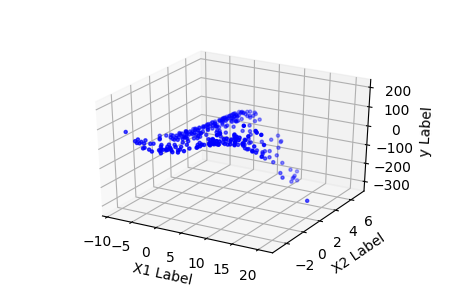

In [12]:
# Draw a 3D interactive scatterplot to see the relationship better
%matplotlib notebook

fig = plt.figure(1, figsize=(4.5,3))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, c='b', marker='.')

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('y Label')
plt.show()

## Used Excel to conduct a series of stepwise (polynomial) regression models.
### The followings are the results from the analysis.


<li> Ultimate solution</li>
<ul> Variables: A, B, and (A^2)*B.</ul>
<ul> Achieved Adjusted R Square: 0.999977627.</ul>
<ul> This might be the generative process for the data. </ul>


<li> Initial solution: </li>
<ul> Variables: A, B, and an interaction variable.</ul>
<ul> Achieved Adjusted R Square: 0.774112537. </ul>
<ul> First Used an interaction variable and later added A_squared too. </ul>

In [13]:
# The ultimate solution...?
ultimate = data.copy()
ultimate['X1^2X2'] = (data['A']**2) * data['B']
ultimate.head(3)

,A,B,C,X1^2X2
0,0.490,-0.18,11.50,-0.043218
1,-1.410,-1.23,11.80,-2.445363
2,0.943,4.51,-3.24,4.010513


#### These two functions are to get a LS solution and predicted Ys, respectively.

In [14]:
def LSsolution(dfX, dfY):
    """
    Returns the Least Square Solution for given parameters.

    Parameters:
            dfX (pd dataframe): Dataframe that has X values
            dfY (pd dataframe): Dataframe that has y values

    Returns:
            LSsol_df (pd dataframe): Dataframe that has coefficients values for variables
    """
    
    tempX = dfX.copy()
    tempX['intercept'] = 1  # Add an intercept variable X0
    
    matrix_X = tempX.to_numpy()
    vector_Y = dfY.to_numpy()
    
    LSsolution = np.linalg.inv(matrix_X.T @ matrix_X) @ matrix_X.T @ vector_Y
    
    LSsol_df = pd.DataFrame(LSsolution, index=tempX.columns.values).transpose()
    LSsol_df.index = ['coefficient']

    return LSsol_df

In [15]:
def predictedY(dfX, w):
    """
    Returns the predicted Y values.
    
    Parameters:
            dfX (pd dataframe): Dataframe that has X values
            w   (pd dataframe): Dataframe that has a coefficients result from LSsolution

    Returns:
            y_hat (pd dataframe): Dataframe that has predicted Y values
    """
    
    tempX = dfX.copy()
    tempX['intercept'] = 1  # Add an intercept variable X0.
    
    w = pd.Series(w.iloc[0])
    calculated = tempX.mul(w, axis=1) # Multiply coefficients to each variable.
    
    # Sum all the variables to calculate the predicted Y
    calculated['predicted'] = calculated[list(calculated.columns)].sum(axis=1)
    y_hat = pd.DataFrame(calculated['predicted'])
    
    return y_hat

#### Get a LS solution for X.

In [16]:
# Get a LSsolution for the ultimate X
ultimate_result = LSsolution(ultimate[['A','B','X1^2X2']], y)

print("The Coefficients for the solution")
print(ultimate_result)

a = predictedY(ultimate[['A','B','X1^2X2']], ultimate_result)
# print("Predicted Y")
# print(a)

The Coefficients for the solution
                    A         B    X1^2X2  intercept
coefficient  2.001831 -2.999807 -0.400257    10.0078


#### Visualize the acutal C & the predicted C at the same time.

the r-squared is:  0.999977852646678


<IPython.core.display.Javascript object>


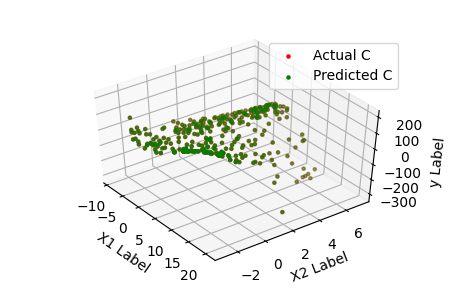

In [17]:
# calculate the r-squared
SSres = y.subtract(a['predicted'], axis=0)
SStot = y - y.mean()
SSres = np.array(SSres)
SStot = np.array(SStot)

rSquared = 1 - (np.sum(SSres**2)/ np.sum(SStot**2))
print("the r-squared is: ", rSquared)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2, figsize=(4.5,3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='r', marker='.', label='Actual C')
ax.scatter(X1, X2, a, color='g', marker='.', label='Predicted C')

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('y Label')
ax.legend()
plt.show()

The above seems to be too identical... Would have suspected overfitting if the data had been real-world and the model had incorportaed a lot of variables.

#### An initial solution which implemented an interaction variable + A_squared
This solution initially gave R_Square = 0.777144583 and Adjusted_R_Square = 0.774112537.

In [18]:
inter = data.copy()
inter['interaction'] = data['A'] * data['B']
inter['Asq'] = data['A'] * data['A']
inter.head(3)

,A,B,C,interaction,Asq
0,0.490,-0.18,11.50,-0.08820,0.240100
1,-1.410,-1.23,11.80,1.73430,1.988100
2,0.943,4.51,-3.24,4.25293,0.889249


#### Get a LS solution, predict the y(C) values, and visualize the data.

the r-squared is:  0.7771445834723121


<IPython.core.display.Javascript object>


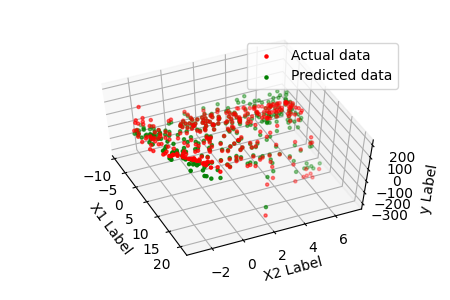

In [19]:
# Get a LSsolution for the initial solution
inter_result = LSsolution(inter[['A','B','interaction','Asq']], y)
a = predictedY(inter[['A','B','interaction','Asq']], inter_result)

# calculate the r-squared
SSres = y.subtract(a['predicted'], axis=0)
SStot = y - y.mean()
SSres = np.array(SSres)
SStot = np.array(SStot)

rSquared = 1 - (np.sum(SSres**2)/ np.sum(SStot**2))
print("the r-squared is: ", rSquared)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(3, figsize=(4.5,3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='r', marker='.', label='Actual data')
ax.scatter(X1, X2, a, color='g', marker='.', label='Predicted data')

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('y Label')
ax.legend()
plt.show()

#### 감사합니다.
#### 황영석 드림